In [1]:
#We want to create and train a model that 
#takes an image of a hand written digit as input and 
#predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

import tensorflow as tf

print('Using TensorFlow version', tf.__version__)
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow version 1.15.0


In [2]:
#We are going to use the popular MNIST dataset
#which has lots of images of hand-written digits along with their labels.

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 21s 2us/step


In [3]:
#we have 60000 training images and 10000 testing images
# each image has 28 pixel height and 28 pixel width

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


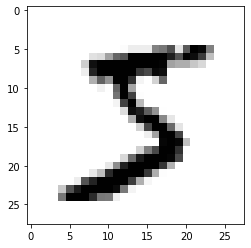

In [16]:
#let's see first handwritten image from training dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [17]:
y_train[0]

5

# One Hot Encoding


We will change the way this label is represented from a class name or number to a list of all possible classes with all the classes set to 0 except the one which this example belongs to - which will be set to 1. For example:

original label	one-hot encoded label

5	[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]  
7	[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]  
1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]  




In [7]:
from tensorflow.python.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
#To make sure the encoding worked, let's check the shape of the encoded labels.
# We convert each example to 10 dimensional vector

print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [9]:
#And just like before, let's also take a look at the first label and make sure that encoding is correct

y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# We will create a Neural Network which will take 784 dimensional vectors as inputs (28 rows * 28 columns)
# and will output a 10 dimensional vector (For the 10 classes)
#We will use numpy to easily unroll the examples from (28, 28) arrays to (784, 1) vectors.


import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [11]:
# Each element in each example is a pixel value. Let's take a look at a few values of just one example.
# Pixel values, in this dataset, range from 0 to 255.

print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [18]:
# Now we will normalise both the training and test set using the mean and standard deviation
# we have to add epsilon to denominator just in case if our x_std was close to zero it provide stability.

x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

mean:  33.318421449829934
std:  78.56748998339798


In [19]:
#We looked at the values for the first training example before. Let's look at it again, after having normalised the values
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Create a Model

In [20]:
# We use a Sequential class defined in Keras to create our model.
from tensorflow.keras.models import Sequential

# All the layers are going to be Dense layers.
from tensorflow.keras.layers import Dense

# we have 2 hidden layers with 128 nodes each
# and one output layer with 10 nodes.
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# Compile a Model

In [21]:
# use "sgd" function as optimizer
# use "categorical_crossentropy" function to minimize loss
# Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train a Model

In [22]:
# by setting the epochs to 3, we will go through all the training examples 3 times.

h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3680 - acc: 0.8913
Epoch 2/3
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1820 - acc: 0.9467
Epoch 3/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1387 - acc: 0.9592


In [23]:
# In order to ensure that this is not a simple "memorization" by the machine, 
# we should evaluate the performance on the test set.
# if test set accuracy is high then our training is successful

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.1278 - acc: 0.9616
test set accuracy:  96.16000056266785


# Predictions

In [26]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


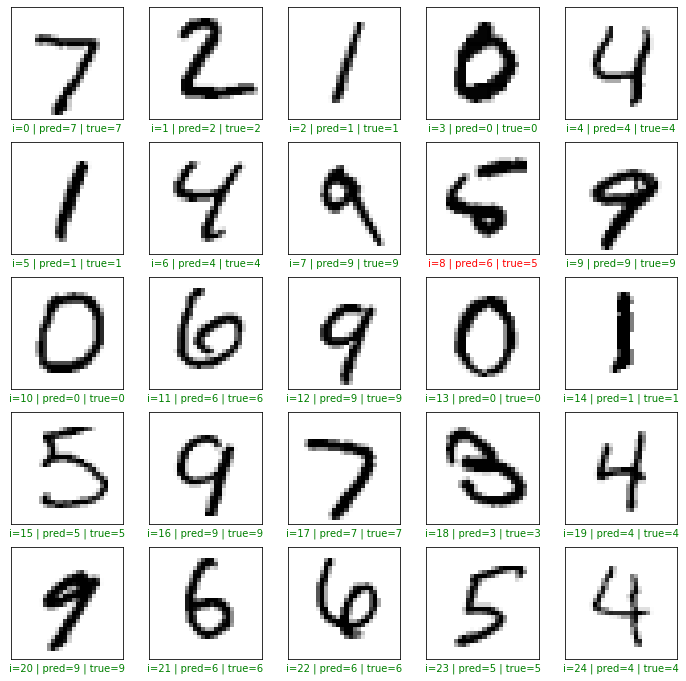

In [27]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

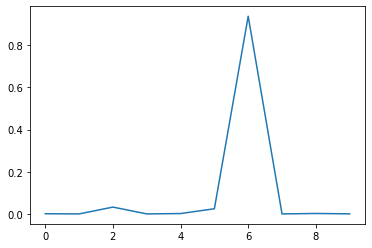

In [28]:
"""
Enter the index value in place of the value 8 below for the prediction
that you want to plot the probability scores for
"""
index = 8

plt.plot(preds[index])
plt.show()